# Seagrass Detection with Sentinel-2

This code demonstrates the process of mapping submerged and non-submerged seagrasses using Sentinel-2 satellite imagery, based on a methodology proposed by Li et al. (2023). The method accounts for the influence of tidal variations on water body inundation, which can affect the spectral characteristics of seagrasses in satellite images. Specifically, the code calculates the Submerged Seagrasses Identification Index (SSI) for submerged seagrasses, using spectral features from Sentinel-2 bands such as the red edge and visible bands. Non-submerged seagrasses are identified using the normalized difference vegetation index (NDVI). The code enables users to specify areas of interest and time periods for data extraction, allowing for tailored seagrass mapping. Results include true color composites and SSII maps, which distinguish submerged seagrasses from other vegetation and water bodies. The SSII, derived from the Sentinel-2 data, is visualized using a color map to highlight submerged seagrass areas effectively. This approach provides valuable insights for ecological management and conservation in coastal zones, as it incorporates tidal influences on seagrass spectral signatures. You can see the flowchart for this method below.

Li, Y., Bai, J., Chen, S., Chen, B., & Zhang, L. (2023). Mapping seagrasses on the basis of Sentinel-2 images under tidal change. *Marine Environmental Research, 185*, 105880.  
![Seagrass Flowchart](../living_coasts/1-s2.0-S0141113623000089-gr3_lrg.jpg)


# Load necessary library

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os, sys


import numpy as np
import xarray as xr
import geopandas as gpd
import rasterio
import datetime

from matplotlib import pyplot
import matplotlib.pyplot as plt

import datacube
from datacube.utils import masking
from datacube.utils.geometry import CRS
from dea_tools.plotting import display_map
from dea_tools.spatial import xr_rasterize
from sentinel_processing import plot_s2_true_color_and_ssii
from tiff_map_overlay import overlay_tiff_on_map
from tiff_utils import main




# Define area of intrest and time range

In [2]:
# User-selected area 


#Moreton Bay
#latitude range
lat_range = (-27.48, -27.38)
#longitude range
lon_range = (153.35, 153.45)
#Define time range

time_range = (datetime.datetime(2018, 7, 9), datetime.datetime(2018, 7, 10))

display_map(lon_range,lat_range)

Checking image for time: 2018-07-09 00:02:41.460000
Valid image found with 0.00% cloud cover.
GeoTIFF saved as SSII_2018-07-09_00-02-41_153.35_153.45_-27.48_-27.38.tif


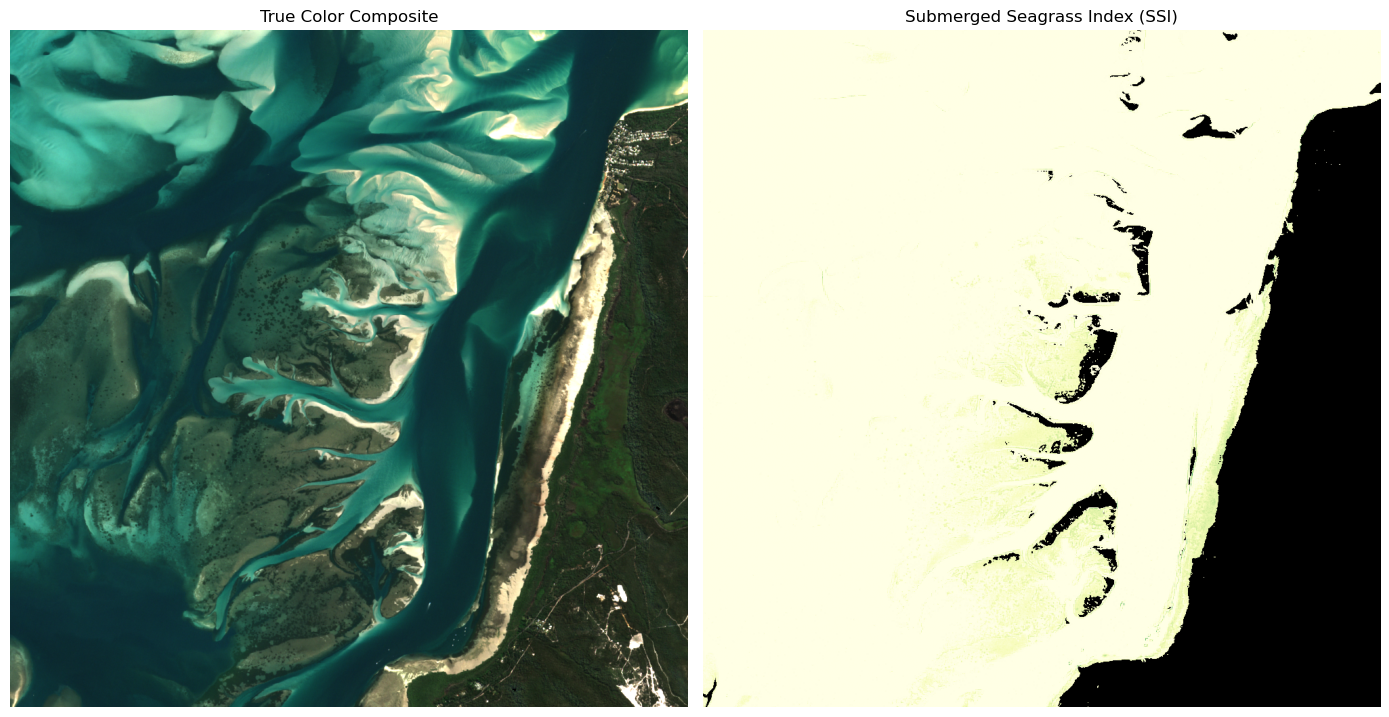

In [3]:
plot_s2_true_color_and_ssii(lon_range, lat_range, time_range, cloud_threshold=5)

# Seagrass Mapping Using Sentinel-2 and Machine Learning
In this section, we explore an alternative method for seagrass mapping using Sentinel-2 imagery combined with machine learning (ML). By leveraging 12 bands from the Sentinel-2 satellite and applying various corrections, we can accurately map seagrass areas. This method involves training a machine learning model on these bands, followed by applying the model to classify the seagrass areas.
After training the ML, we applied it to classify seagrass areas. The output of the model, which identifies seagrass areas within the study region, was saved as a GeoTIFF file. This TIFF file contains the classification results, where each pixel represents either seagrass or non-seagrass based on the model's prediction.



In [8]:
# #Path of tiff file
# tiff_file = "Mo1.tif"  # Change this to your TIFF file path

# main(tiff_file, lat_range, lon_range)


# Overlay Results on Map and Save as HTML
The trained model’s results, stored in the TIFF file, can be easily visualized on a map. By reading the TIFF file, we can overlay the seagrass classification results on a geographic map to examine the predicted seagrass distribution in the study area.

To enhance the visualization, the results can be saved as an interactive HTML file, allowing users to explore the seagrass coverage across the region directly in a web browser.

In [ ]:
# #Overlay
# # Call the function to overlay the TIFF on a Folium map
# overlay_tiff_on_map(tiff_file, lat_range, lon_range, save_path="output_map.html")